In [1]:
import torch
from lhotse import CutSet, Fbank, FbankConfig, load_manifest
from pathlib import Path
from prep_data import fbank_params, target_audio_params
from matplotlib import pyplot as plt
from typing import Union
import numpy as np
from torchaudio.functional import highpass_biquad, lowpass_biquad, amplitude_to_DB
from torchaudio.transforms import MuLawEncoding, MuLawDecoding, Resample, Spectrogram
import librosa
import torchaudio
import scipy.signal as signal
from IPython.display import Audio

D:\ml-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
cuts = CutSet.from_file("data/cuts_dev-clean.jsonl.gz")
cut = cuts[0]
audio = torch.from_numpy(cut.load_audio())

downsample = Resample(16000, 8000)
upsample = Resample(8000, 16000)
mulaw_enc = MuLawEncoding()
mulaw_dec = MuLawDecoding()
extractor = Spectrogram(n_fft=1024)

In [8]:

audio_8k = downsample(audio)
audio_8k_lp = lowpass_biquad(audio_8k, 8000, 3400)
audio_8k_lp_hp = highpass_biquad(audio_8k_lp, 8000, 300)
audio_8k_lp_hp_16k = upsample(audio_8k_lp_hp_pcm)

src = extractor(audio)[0,:,:]
tgt_8k = extractor(audio_8k)[0,:,:]
tgt_8k_mu = extractor(audio_8k_mu)[0,:,:]
tgt_8k_mu_lp = extractor(audio_8k_mu_lp)[0,:,:]
tgt_8k_mu_lp_hp = extractor(audio_8k_mu_lp_hp)[0,:,:]
tgt_8k_mu_lp_hp_16k = extractor(audio_8k_mu_lp_hp_16k)[0,:,:]

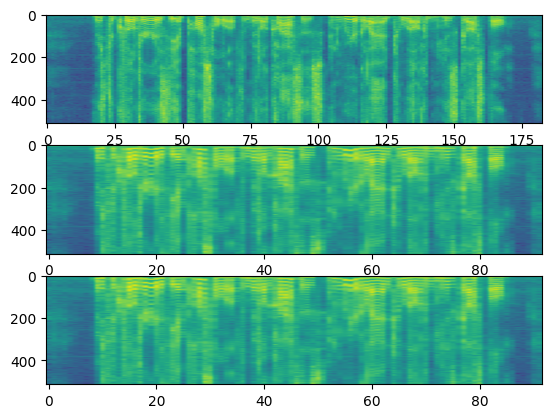

In [10]:
plt.subplot(3,1,1)
plt.imshow(amplitude_to_DB(src, 10, -10, 3), aspect='auto')
plt.subplot(3,1,2)
plt.imshow(amplitude_to_DB(tgt_8k, 10, -10, 3), aspect='auto')
plt.subplot(3,1,3)
plt.imshow(amplitude_to_DB(tgt_8k_mu, 10, -10, 3), aspect='auto')

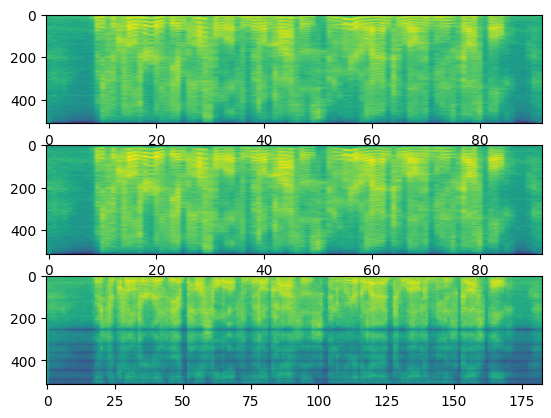

In [11]:
plt.subplot(3,1,1)
plt.imshow(amplitude_to_DB(tgt_8k_mu_lp, 10, -10, 3), aspect='auto')
plt.subplot(3,1,2)
plt.imshow(amplitude_to_DB(tgt_8k_mu_lp_hp, 10, -10, 3), aspect='auto')
plt.subplot(3,1,3)
plt.imshow(amplitude_to_DB(tgt_8k_mu_lp_hp_16k, 10, -10, 3), aspect='auto')

In [9]:
torchaudio.save("data/sandbox/audio.wav", audio, 16000, True, 'wav')
torchaudio.save("data/sandbox/audio_8k.wav", audio_8k, 8000, True, 'wav')
torchaudio.save("data/sandbox/audio_8k_mu.wav", audio_8k_mu, 8000, True, 'wav')
torchaudio.save("data/sandbox/audio_8k_mu_lp.wav", audio_8k_mu_lp, 8000, True, 'wav')
torchaudio.save("data/sandbox/audio_8k_mu_lp_hp.wav", audio_8k_mu_lp_hp, 8000, True, 'wav')
torchaudio.save("data/sandbox/audio_8k_mu_lp_hp_16k.wav", audio_8k_mu_lp_hp_16k, 16000, True, 'wav')

In [8]:
enc = downsample(audio)
enc = lowpass_biquad(enc, 8000, 3400)
enc = highpass_biquad(enc, 8000, 300)
enc = mulaw_dec(mulaw_enc(enc))
dec = upsample(enc)


Audio(data=dec, rate=16000)

In [12]:
downsample = Resample(16000, 8000)
for param in downsample.parameters():
    print(param)

In [13]:
downsample.parameters()

<generator object Module.parameters at 0x000002955BB7F060>

In [14]:
list(downsample.parameters())

[]